## **Part 1 :  Exploratory Data Analysis**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# Read data
path = '01 - Data/ecom customer_data.xlsx'
# Read Data into a DataFrame
df = pd.read_excel(path)

## ***Data Cleaning 🧹🧹***

​	✅Handle Empty Rows

​	✅Handle Duplicated Rows

In [ ]:
# ------------------------------------------------------------------
# HANDLE NULLS IN THE GENDER COLUMN
# ------------------------------------------------------------------

# Check NULLS in the DF
# df.isnull().sum()

# Check Duplicated Rows
# df.duplicated().sum()

# Fill NULLS in this new copy with new values
df['Gender'] = df['Gender'].fillna('No Gender')

# Check Filled NULLS
# df['Gender'].unique()

## ***Data Exploration 🔬🔬***

​	✅Group the rows by values in Gender column

​	✅Sum the number of orders in every company

​	✅Plot Top 5 and Bottom 5 companies

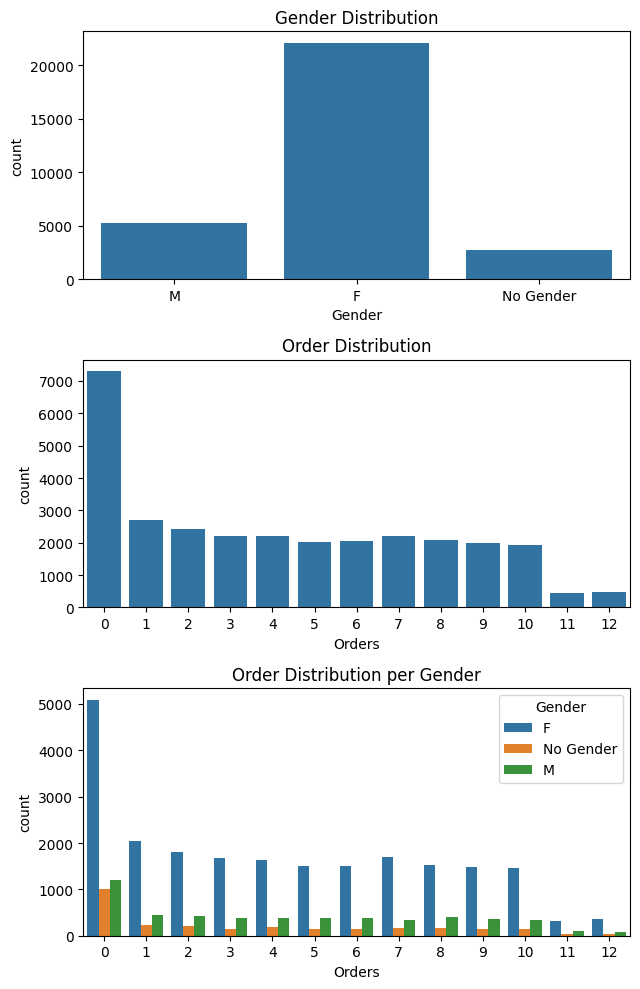

In [115]:
plt.figure(figsize = (6.5, 10))

plt.subplot(3, 1, 1)
sns.countplot(data = df, x = 'Gender')
plt.title('Gender Distribution')

plt.subplot(3, 1, 2)
sns.countplot(data = df, x = 'Orders')
plt.title('Order Distribution')

plt.subplot(3, 1, 3)
sns.countplot(data = df, x = 'Orders', hue = 'Gender')
plt.title('Order Distribution per Gender')

plt.tight_layout()
plt.show()


## ***Data Exploration 🔬🔬***

​	✅Group the rows by values in Gender column

​	✅Sum the number of orders in every company

​	✅Plot Top 5 and Bottom 5 companies

In [ ]:
# ------------------------------------------------------------------
# DATA TRANSFORMATIONS AND EXPLORATIONS
# ------------------------------------------------------------------

# Make a copy of the DF
df_t = df.copy()
df_t.drop('Cust_ID', axis = 1, inplace = True)

# Group the Data by the values in Gender Column
# Then Aggregate the result by the sum of each occurance
df_t = df_t.groupby('Gender').sum()

# Transpose the DF
df_t = df_t.T

# Create New column as a sum of Males and Females
df_t['Total'] = df_t['M'] + df_t['F'] + df_t['No Gender']

# Rename and Rearrange columns
cols = {'F' : 'Females', 'M' : 'Males'}
df_t.rename(columns = cols, inplace = True)
df_t = df_t[['Total', 'Females', 'Males', 'No Gender']]

# Sort Values from Highest to Lowest
df_t = df_t.sort_values(by = 'Total', ascending = False)
df_t = df_t.T

In [ ]:
# ------------------------------------------------------------------
# PLOT GRAPHS
# ------------------------------------------------------------------

title1 = 'Top 5 Companies'
title2 = 'Bottom 5 Companies'
xlabel_ = 'Company'
ylabel_ = 'Sum Total'

plt.figure(figsize = (10, 6))
# Plot the Top 5
df_t[2:7].plot.bar()
plt.title(title1)
plt.ylabel(ylabel_)
plt.xlabel(xlabel_)
plt.xticks(rotation=0)

# Plot the Bottom 5
df_t[-5:].plot.bar()
plt.title(title2)
plt.ylabel(ylabel_)
plt.xlabel(xlabel_)
plt.xticks(rotation=0)

From the Bar chart arranged from the Highest to Lowest, The top 5 comapnies with the leading Market share are:
 J.M. Smucker
 Juniper
 Burberry
 Scabal
 H&M

the bottom 5 comapanies in terms of trailing market share are:
  Hollister
  Kraft
  Forever 21
  Siemens
  IBM

Females are the leading in orders followed by men and lastly those who did not disclose their gender.

In [ ]:
# sns.barplot(data = df_t, hue = 'Gender', y = 'Orders', gap = 0.2)
# plt.figure(figsize = (15, 7))
# plt.subplot(1,2,1)
# sns.barplot(data = df_t, hue = 'Gender', y = 'Siemens', gap = 0.2)

In [ ]:
cols = list(df_t.columns)

def dist_list(lst):
    plt.figure(figsize = (50, 50))
    for i, col in enumerate(lst, 1):
        plt.subplot(10,4,i)
        sns.boxplot(data = df_t, y = df_t[col])

dist_list(cols)

In [ ]:
# ------------------------------------------------------------------
# ENCODE CATEGORICAL VALUES IN THE GENDER COLUMN -> ORDINAL ENCODER
# ------------------------------------------------------------------

df2 = df.copy()

ord_enc = OrdinalEncoder()
df2 = ord_enc.fit_transform(df[['Gender']])
df3 = pd.DataFrame(df2, columns = ['Gender_Cat'])
df3 = pd.merge(left = df3, right = df['Orders'],
               left_index = True, right_index = True)



x = df3.values

In [ ]:
# ------------------------------------------------------------------
# KMEANS CLUSTERING
# ------------------------------------------------------------------

# Extract Values from DF3
x = df3.values

wcss = []

for i in range (1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [ ]:
# plot an elbow graph
plt.plot(range(1,7),wcss,color='green', marker='o',
         linestyle='dashed',linewidth=2, markersize=6)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia Of Model")
plt.show()

In [ ]:
# ------------------------------------------------------------------
# KMEANS WITH 4 CLUSTERS
# ------------------------------------------------------------------

best_kmeans = KMeans(n_clusters = 4, n_init = 10, random_state = 42)
cluster = best_kmeans.fit_predict(x)
df3['Cluster'] = cluster

In [ ]:
decode = ord_enc.inverse_transform(df3[['Gender_Cat']])
df4 = pd.DataFrame(decode, columns = ['Gender'])
df4 = pd.merge(left = df3[['Orders', 'Cluster']], right= df4,
          left_index = True, right_index = True)

df4.head(4)

In [ ]:
df4_g = df4.groupby('Cluster').count()
df4_g.head(10)

In [ ]:
bars = plt.bar(df4_g.index, df4_g['Gender'])
plt.title = 'Clusters'
plt.xlabel = 'Cluster'
plt.ylabel = 'Count'
# plt.show

In [ ]:
# ------------------------------------------------------------------
# ENCODE CATEGORICAL VALUES IN THE GENDER COLUMN -> ONE HOT ENCODER
# ------------------------------------------------------------------

df_enc = df.copy()
one_hot = OneHotEncoder()
df_enc = one_hot.fit_transform(df_enc[['Gender']])
df_enc = df_enc.toarray()
df_enc = pd.DataFrame(df_enc)

# Check encoded categories
# one_hot.categories_

In [ ]:
# ------------------------------------------------------------------
# PREPARE MODEL DATA
# ------------------------------------------------------------------

df_OH = pd.DataFrame()
df_OH = df[['Orders']]
df_OH = pd.concat([df_OH, df_enc], axis = 1)
x2 = df_OH.values
x2


In [ ]:
# ------------------------------------------------------------------
# KMEANS CLUSTERING 2
# ------------------------------------------------------------------

wcss2 = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x2)
    wcss2.append(kmeans.inertia_)

In [ ]:
# plot an elbow graph
plt.plot(range(1,11),wcss2,color='green', marker='o',
         linestyle='dashed',linewidth=2, markersize=6)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia Of Model")
plt.show()

In [ ]:
# ------------------------------------------------------------------
# BINNING
# ------------------------------------------------------------------

df_bin = pd.DataFrame(df['Orders'])
df_bin['Orders'].unique()

# Create a column with 5 bins
df_bin['Bins'] = pd.cut(df_bin['Orders'], 5, labels = range(1, 6))

# Prepare for the KMeans Model
x3 = df_bin['Bins']
x3 = x3.to_numpy()
x3 = x3.reshape(-1, 1)

In [ ]:
# ------------------------------------------------------------------
# KMEANS CLUSTERING 3
# ------------------------------------------------------------------

wcss3 = []

for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x3)
    wcss3.append(kmeans.inertia_)

In [ ]:
# plot an elbow graph
plt.plot(range(1,5),wcss3,color='green', marker='o',
         linestyle='dashed',linewidth=2, markersize=6)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia Of Model")
plt.show()